In [1]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
sns.set(font_scale=2.5)

import missingno as msno

warnings.filterwarnings('ignore')
# 경고를 줄여줌

%matplotlib inline 
# matplotlib show할때 따로 창이 나오는 대신 화면 안에 나옴


/var/folders/t5/fq6jxm613jldyb4rpqfywpdm0000gn/T/ipykernel_13766/3846925617.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
df_train = pd.read_csv('../dataset/train.csv')

In [3]:
df_test = pd.read_csv('../dataset/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
for col in df_train.columns:
    msg = 'column:{:>10}\t percent of NaN value {: .2f}%'.format(col,
                                                                 100 * df_train[col].isnull().sum() / df_train.shape[0])
    print(msg)

column:PassengerId	 percent of NaN value  0.00%
column:  Survived	 percent of NaN value  0.00%
column:    Pclass	 percent of NaN value  0.00%
column:      Name	 percent of NaN value  0.00%
column:       Sex	 percent of NaN value  0.00%
column:       Age	 percent of NaN value  19.87%
column:     SibSp	 percent of NaN value  0.00%
column:     Parch	 percent of NaN value  0.00%
column:    Ticket	 percent of NaN value  0.00%
column:      Fare	 percent of NaN value  0.00%
column:     Cabin	 percent of NaN value  77.10%
column:  Embarked	 percent of NaN value  0.22%


In [9]:
for col in df_test.columns:
    msg = 'column:{:>10}\t percent of NaN value {: .2f}%'.format(col,
                                                                 100 * df_test[col].isnull().sum() / df_test.shape[0])
    print(msg)

column:PassengerId	 percent of NaN value  0.00%
column:    Pclass	 percent of NaN value  0.00%
column:      Name	 percent of NaN value  0.00%
column:       Sex	 percent of NaN value  0.00%
column:       Age	 percent of NaN value  20.57%
column:     SibSp	 percent of NaN value  0.00%
column:     Parch	 percent of NaN value  0.00%
column:    Ticket	 percent of NaN value  0.00%
column:      Fare	 percent of NaN value  0.24%
column:     Cabin	 percent of NaN value  78.23%
column:  Embarked	 percent of NaN value  0.00%


<Axes: >

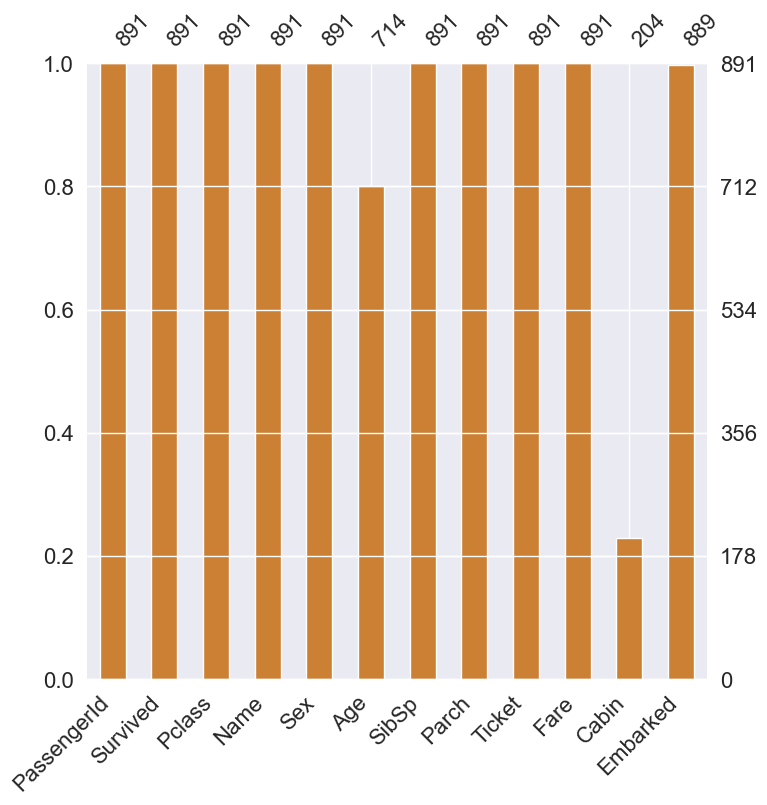

In [10]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

# EDA(Exploratory Data Analysis, 탐색적 데이터 분석)
데이터를 분석하고 결과를 내는 과정에 있어서 지속적으로 해당 데이터에 대한 ‘탐색과 이해’를 기본으로 가져야 한다는 것

1. raw data 의 description, dictionary 를 통해 데이터의 각 column들과 row의 의미를 이해하는 기술.
2. 결측치 처리 및 데이터필터링 기술.
3. 누구나 이해하기 쉬운 시각화를 하는 기술

## Survived

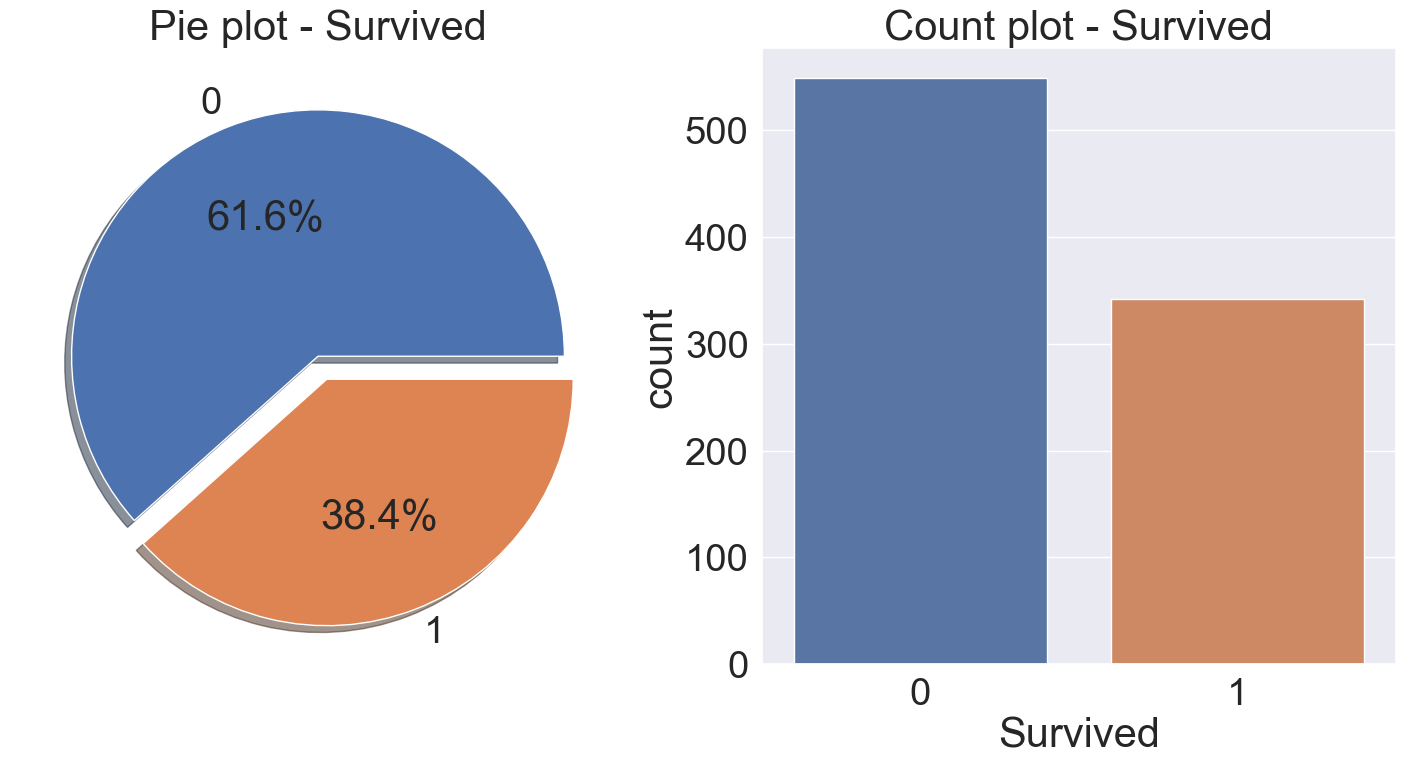

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# 그리드가 1x2인 서브 플롯을 생성 f는 전체 그림에 대한 참조, ax는 배열로 각각의 서브플롯에 대한 참조
# 도화지를 그리는 과정이랑 비슷함

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
# df_train['Survived'].value_counts() : survived 컬럼의 빈도수 계산
# plot.pie 파이 차트를 그리는 메소드
# explode = [0,0.1] 파이차트의 두번째 조각을 조금 떨어트려 표를 그림 => 각각의 요소를 중심에서 얼마나 떨어트릴건지
# autopct = '%1.1f%%' : 파이에 표시되는 값 형식 지정, 여기서는 소수점 아래 한자리 백분율 표시 
# 뒤에 %%는 %를 붙여서 표시하라는 의미
# ax=ax[0] : 서브플롯의 첫번째에 그리라

ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=df_train, ax=ax[1])
# 라이브러리 카운트 플롯 함수
# survived 컬럼 값에 따라 카운트 진행
# 데이터 프레임 지정

ax[1].set_title('Count plot - Survived')
plt.show()

## P class

In [12]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()
# 데이터프레임에서 pclass와 survived를 가져오고, groupby로 묶는다. 
# 이러면 객체가 되고 뒤에 count sum 같은 메소드를 쓸 수 있게 된다.
# as_index 는 사용하면 pclass가 인덱스가 됨, 아니면 열이 하나가 더생김

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()
# 이렇게하면 생존자 수

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)
# 교차 테이블 생성하는 것, 여기서 margin을 추가하면 합계 행과 열이 추가됨

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

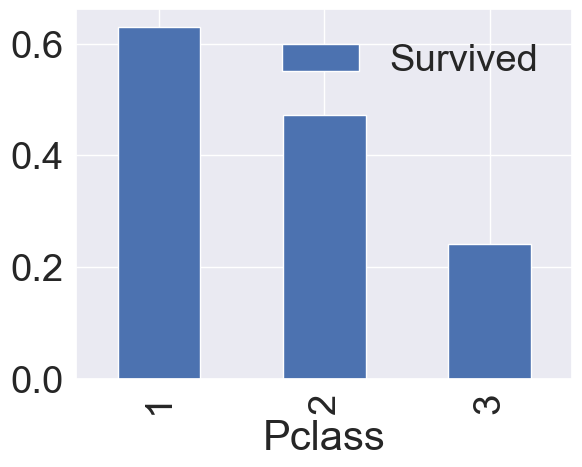

In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived',
                                                                                       ascending=False).plot.bar()

# 평균을 구하는 것 => 여기선 생존률
# sort_values(by='Survived', ascending=False) : 내림차순으로 정렬
# as index를 안하면 그래프가 2개가 나옴 => as index 해줘야함

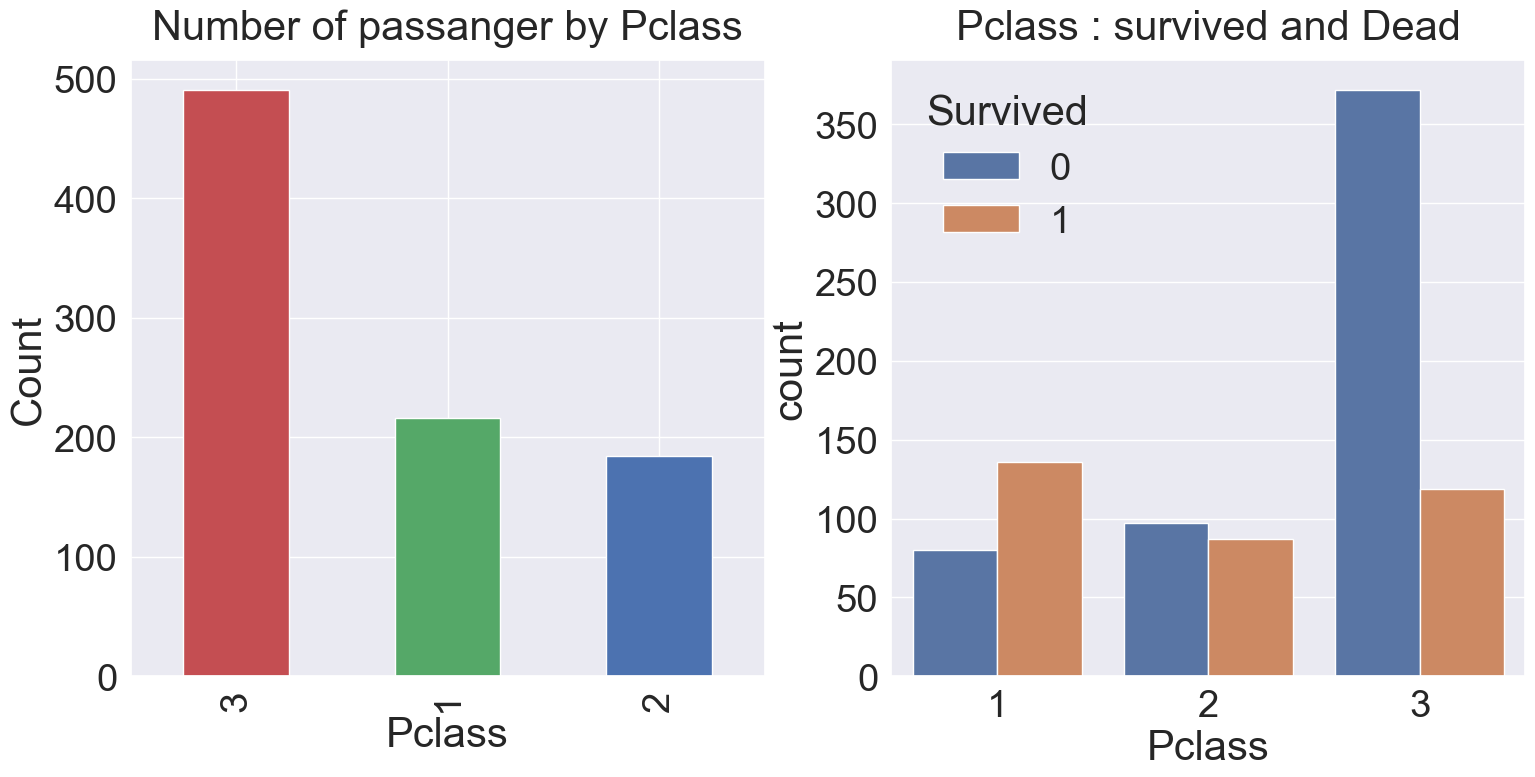

In [16]:
y_position = 1.02  # 제목의 위치 설정
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['r', 'g', 'b'], ax=ax[0])
ax[0].set_title('Number of passanger by Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass : survived and Dead', y=y_position)
plt.show()

## 2.2 성별

In [17]:
df_train[['Sex', 'Survived']]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [18]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


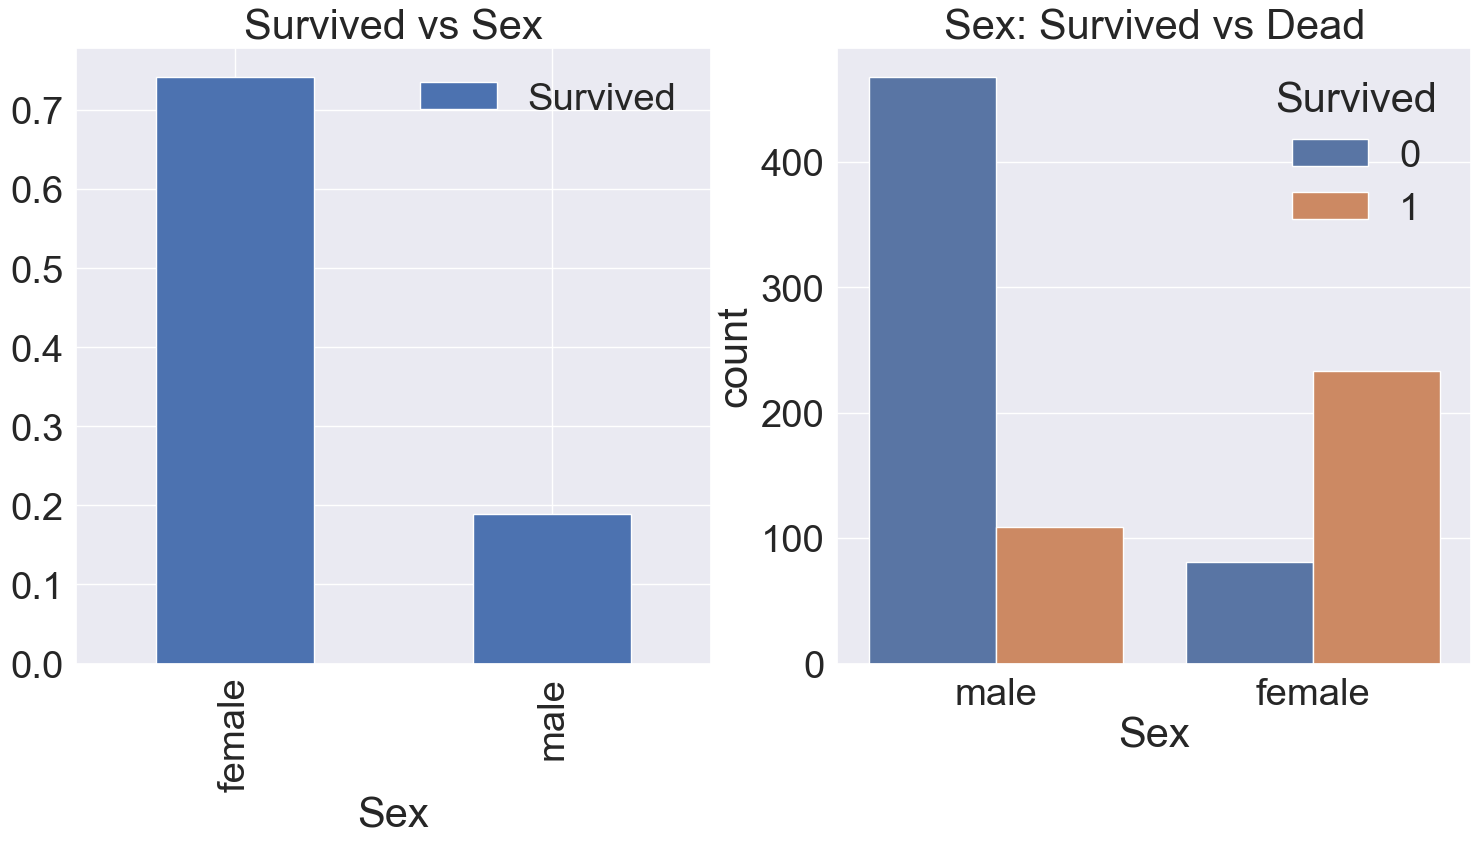

In [19]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [20]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


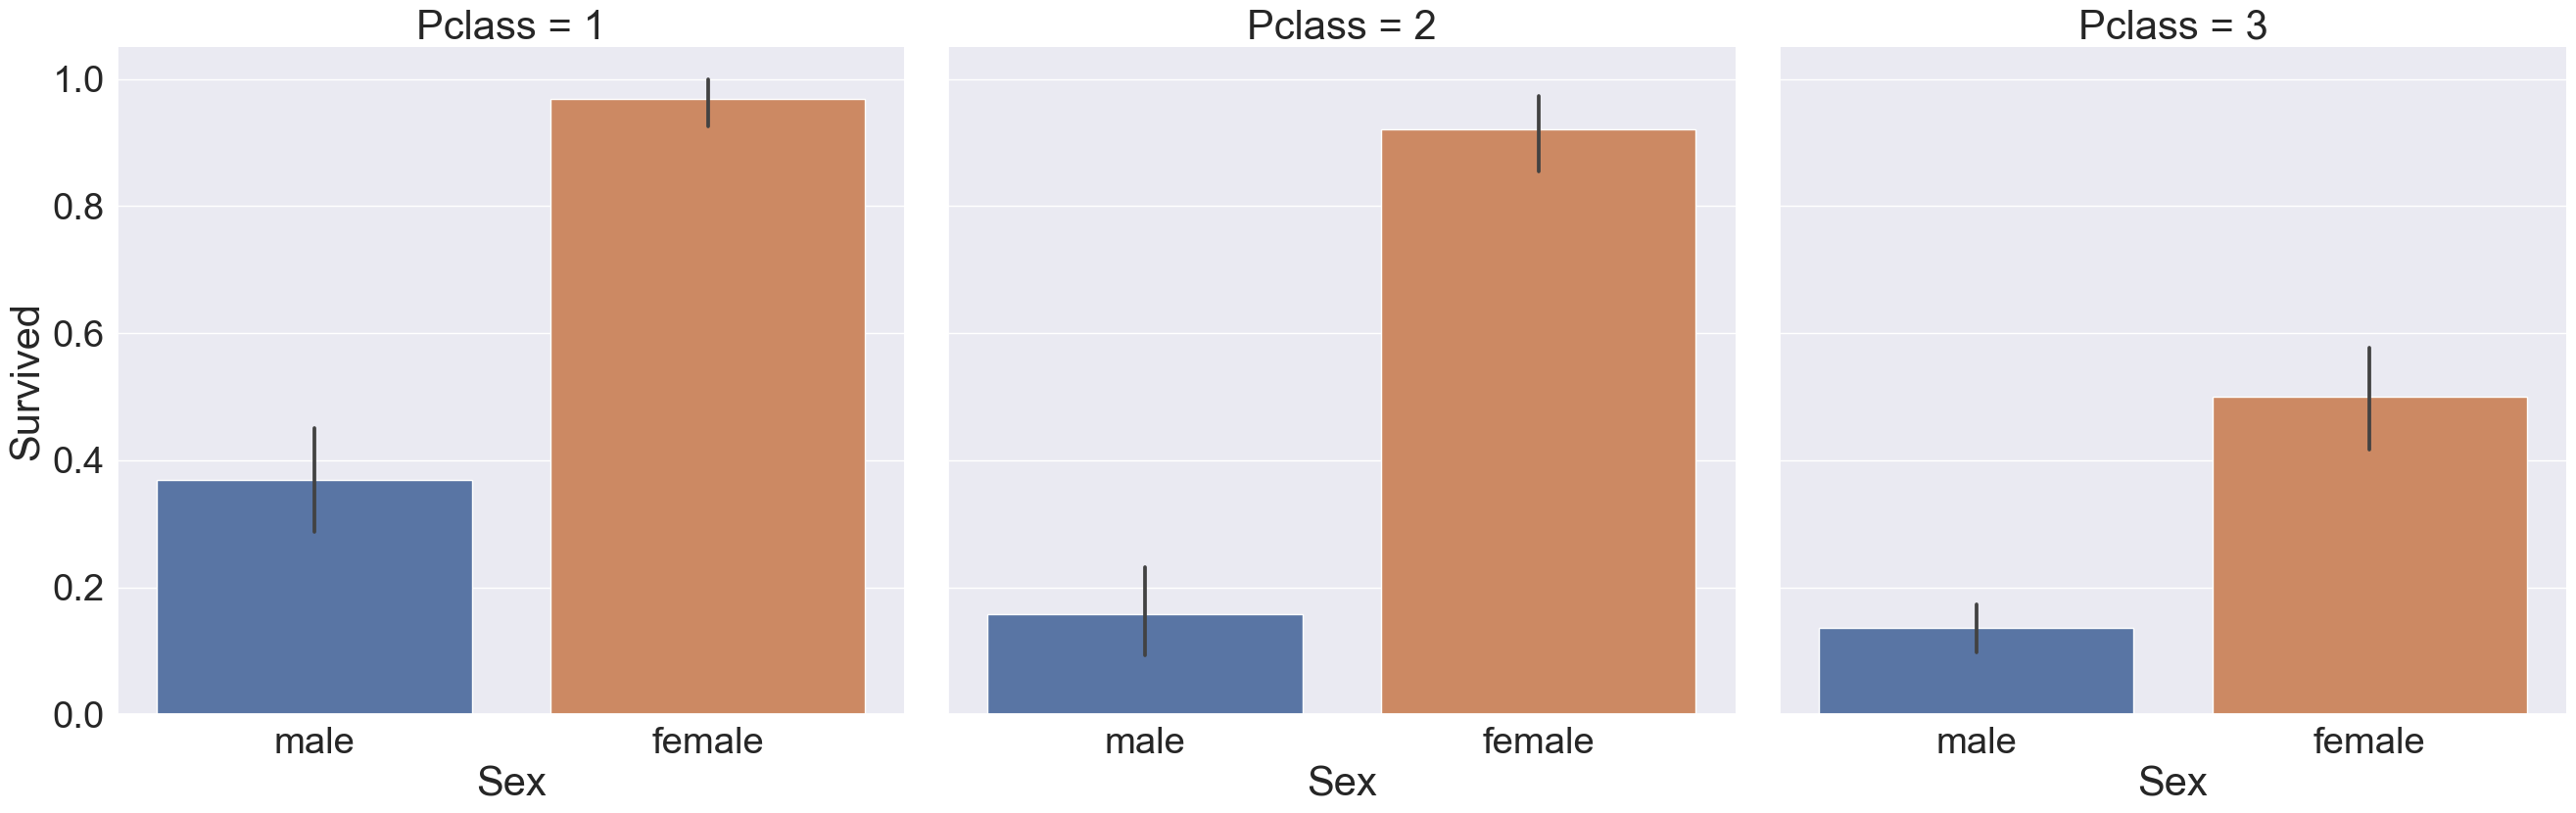

In [21]:
# pclass와 성별 

sns.catplot(x='Sex', y='Survived', col='Pclass',
            data=df_train, kind="bar",
            height=9, aspect=1)


## Age

In [22]:
print('제일 나이가 많은 탑승객 : {:.1f}years'.format(df_train['Age'].max()))
print('제일 나이가 어린 탑승객 : {:.1f}years'.format(df_train['Age'].min()))
print('탑승객 나이 평균 : {:.1f}years'.format(df_train['Age'].mean()))

제일 나이가 많은 탑승객 : 80.0years
제일 나이가 어린 탑승객 : 0.4years
탑승객 나이 평균 : 29.7years


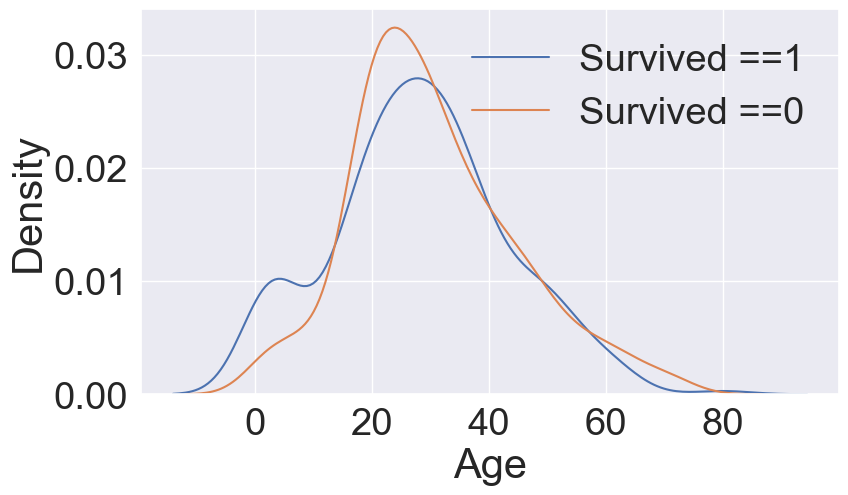

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
# 커널 밀도 추정 Kernel density estimation
# 히스토그램을 커널함수를 이용해서 스무스하게 보여주는 것

plt.legend(['Survived ==1', 'Survived ==0'])
plt.show()

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

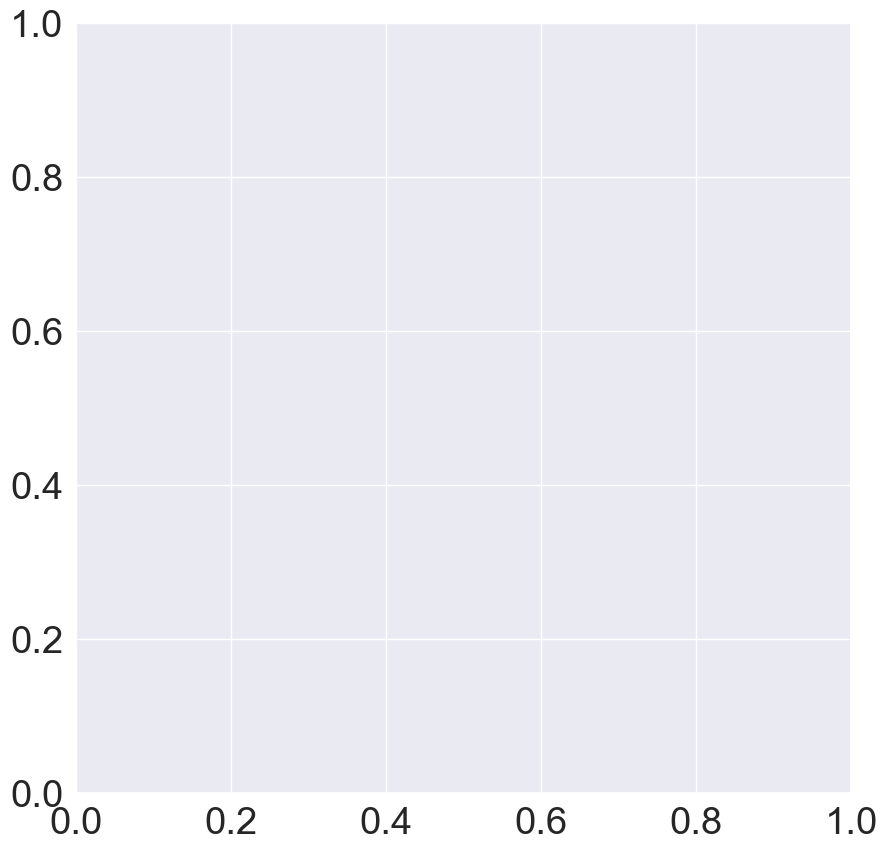

<Figure size 1000x1000 with 0 Axes>

In [24]:
# 맷 플롯 립 방식 3가지 동일함
f = plt.figure(figsize=(10, 10))

f, ax = plt.subplots(1, 1, figsize=(10, 10))

plt.figure(figsize=(10, 10))

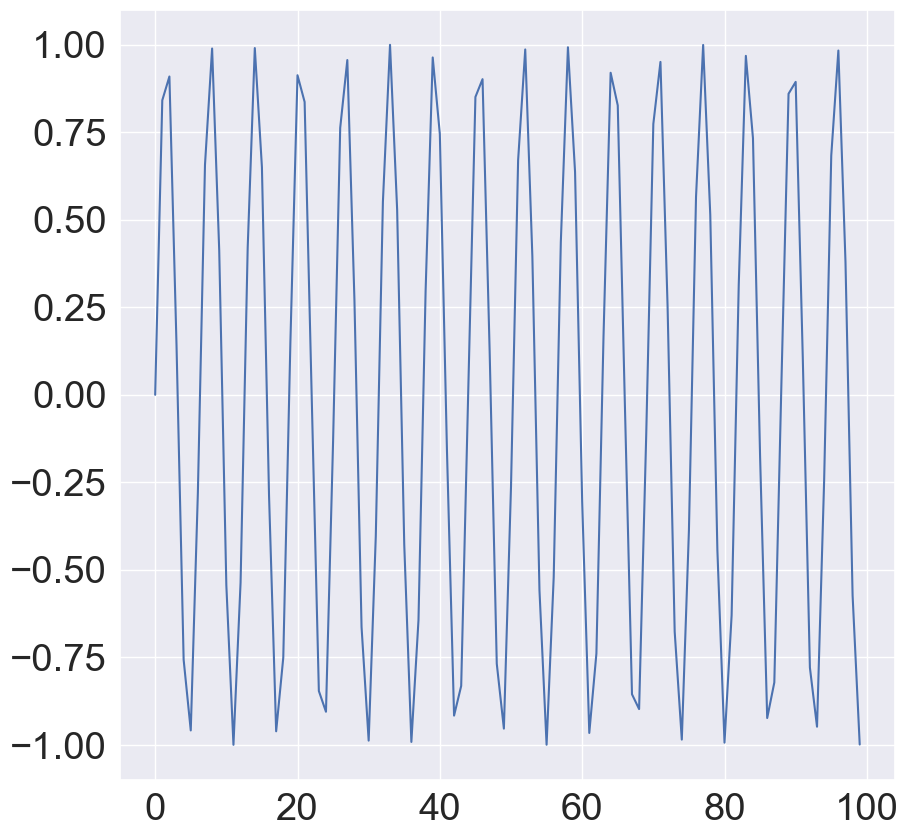

In [25]:
f = plt.figure(figsize=(10, 10))
a = np.arange(100)
b = np.sin(a)
plt.plot(b)

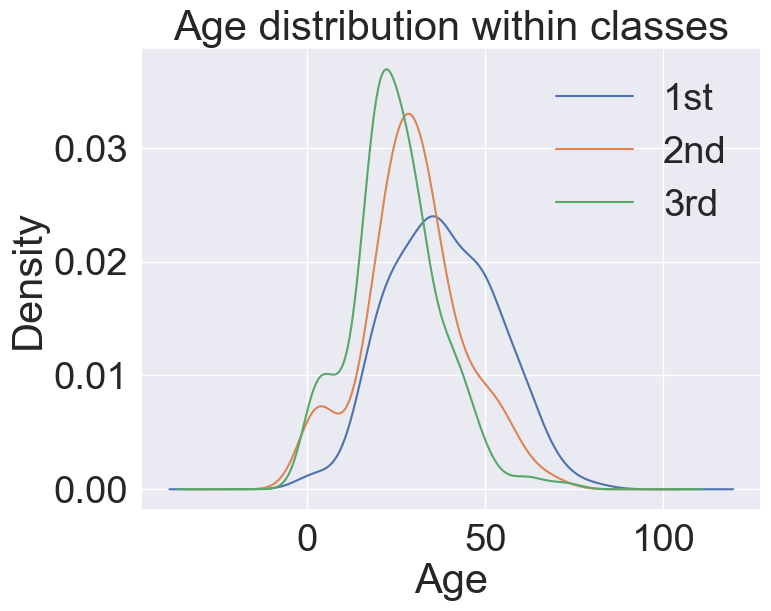

In [26]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
# ax 방식에서는 set_xx 이런식으로 해야함
plt.title('Age distribution within classes')
plt.legend(['1st', '2nd', '3rd'])
# 이 데이터에서는 생존률이 X, 사람의 분포를 생각함

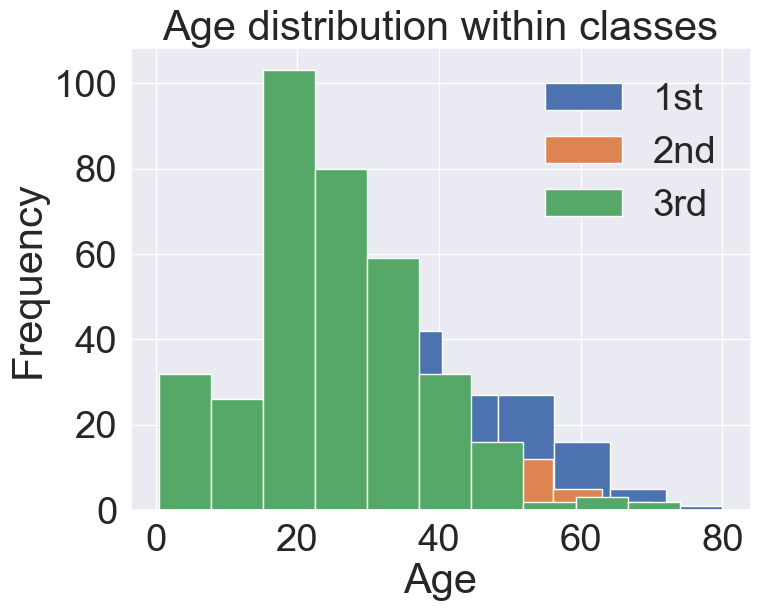

In [27]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='hist')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='hist')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='hist')
plt.xlabel('Age')
plt.title('Age distribution within classes')
plt.legend(['1st', '2nd', '3rd'])
# 이렇게 하면 뒤에 있는게 안보임

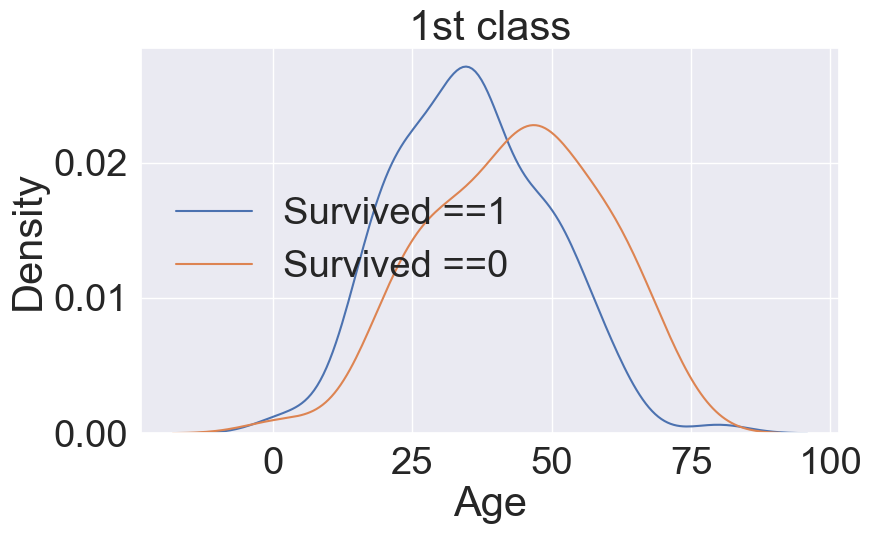

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
# 커널 밀도 추정 Kernel density estimation
# 히스토그램을 커널함수를 이용해서 스무스하게 보여주는 것

plt.title('1st class')
plt.legend(['Survived ==1', 'Survived ==0'])
plt.show()

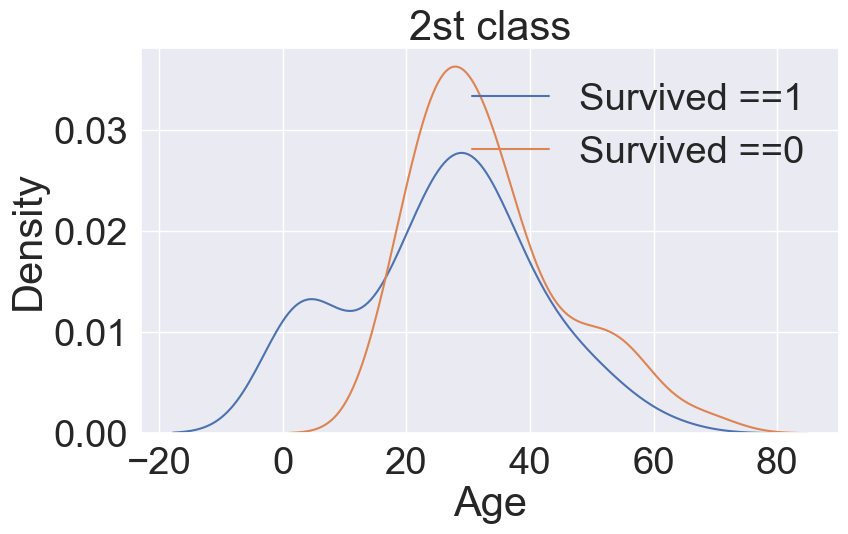

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
# 커널 밀도 추정 Kernel density estimation
# 히스토그램을 커널함수를 이용해서 스무스하게 보여주는 것
plt.title('2st class')
plt.legend(['Survived ==1', 'Survived ==0'])
plt.show()

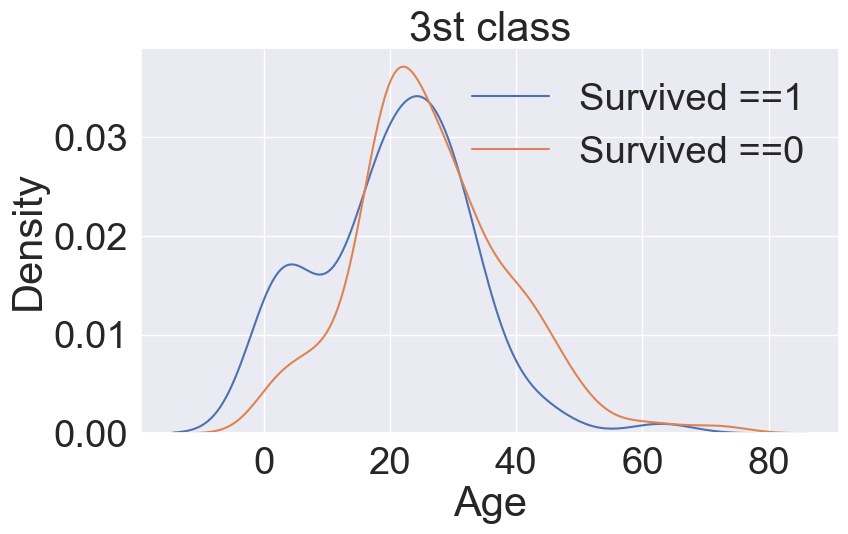

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
# 커널 밀도 추정 Kernel density estimation
# 히스토그램을 커널함수를 이용해서 스무스하게 보여주는 것
plt.title('3st class')
plt.legend(['Survived ==1', 'Survived ==0'])
plt.show()

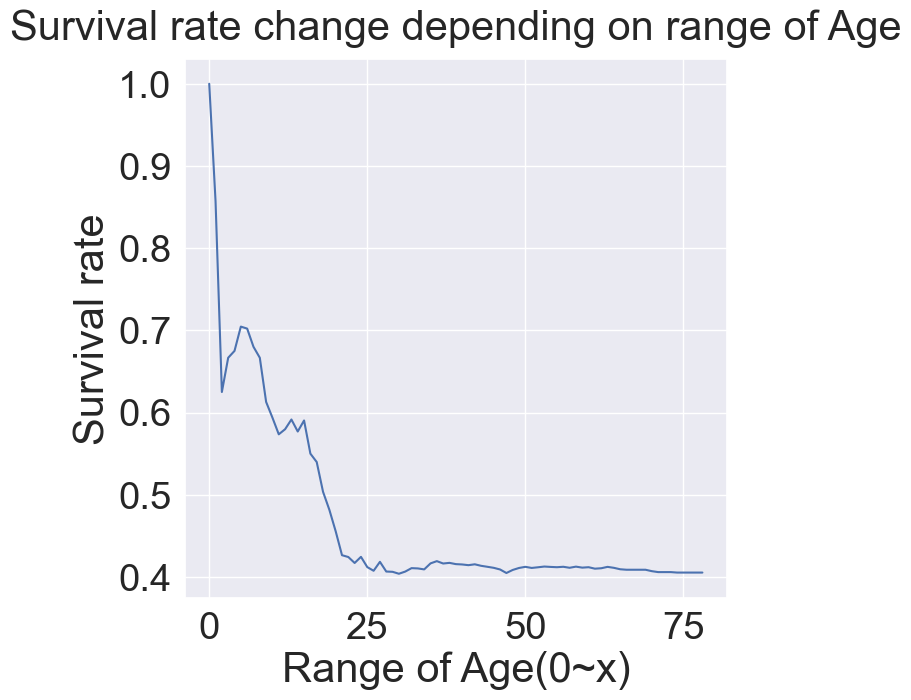

In [31]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(
        df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()
# 그 나이보다 어린 사람들의 누적 생존률

## 지금까지 한거 한번에 보기

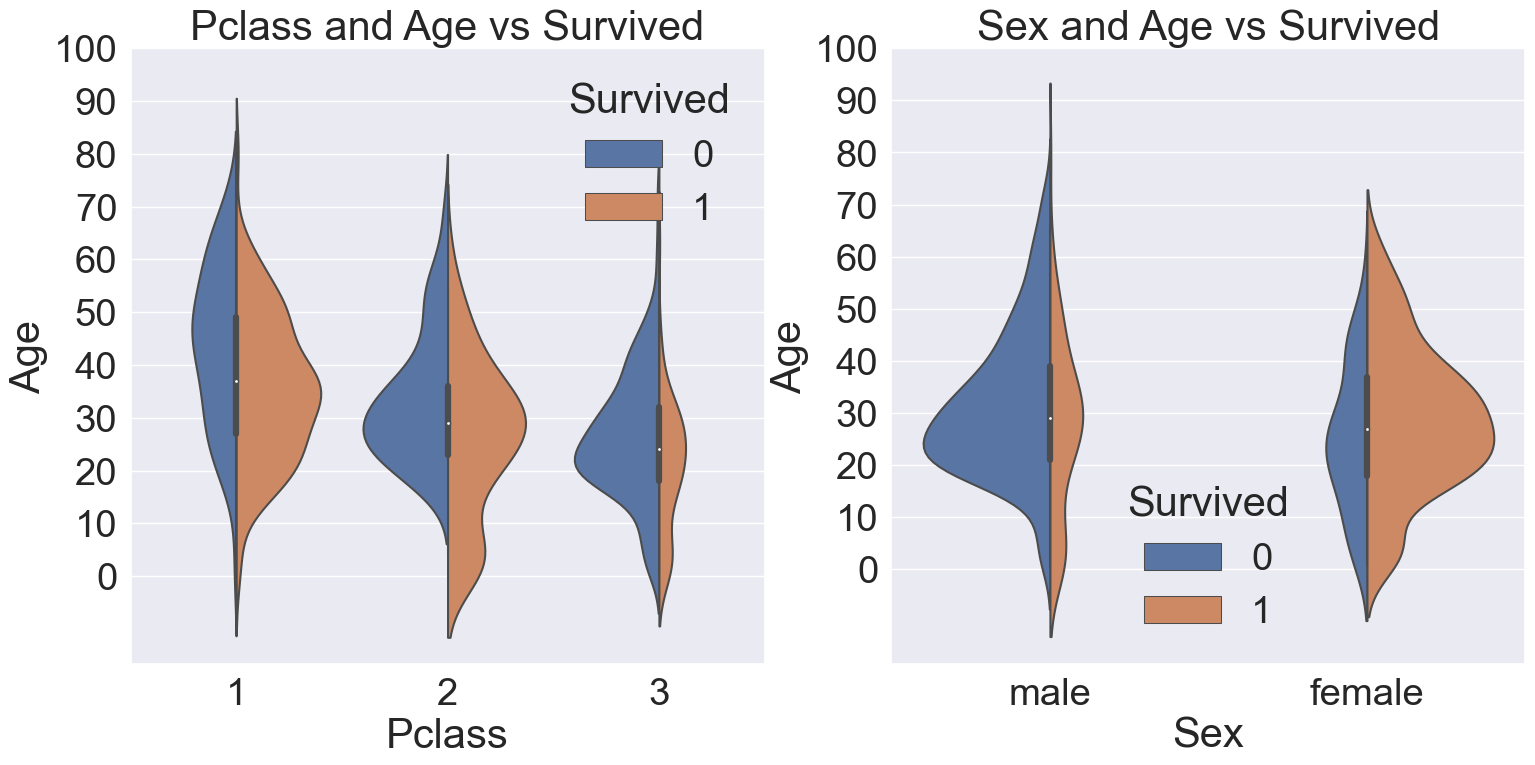

In [32]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
# scale = 너비가 데이터 분포정돌르 어떻게 반영할지, count => 너비가 관측수에 비례, area나 width 옵션이 있다
# split = hue 범주를 양쪽으로 나누어 표시할지를 결정

ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
# y축 눈금 생성

sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

## embarked (탑승장소)


<Axes: xlabel='Embarked'>

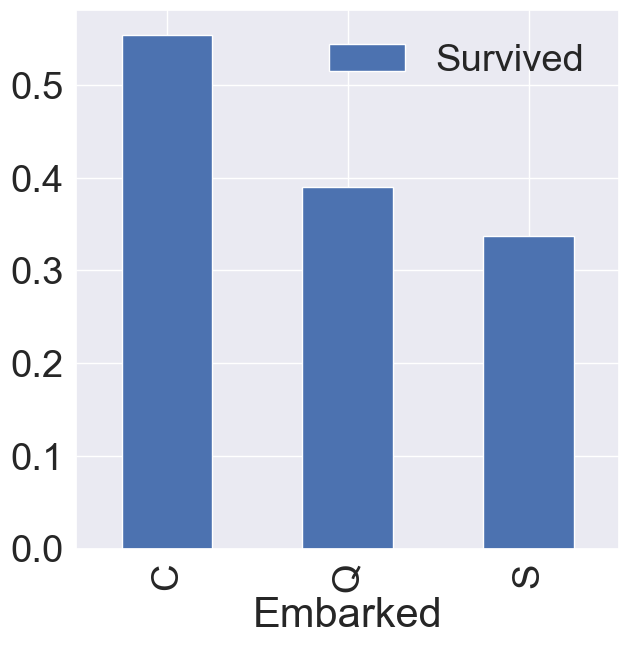

In [33]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived',
                                                                                           ascending=False).plot.bar(
    ax=ax)


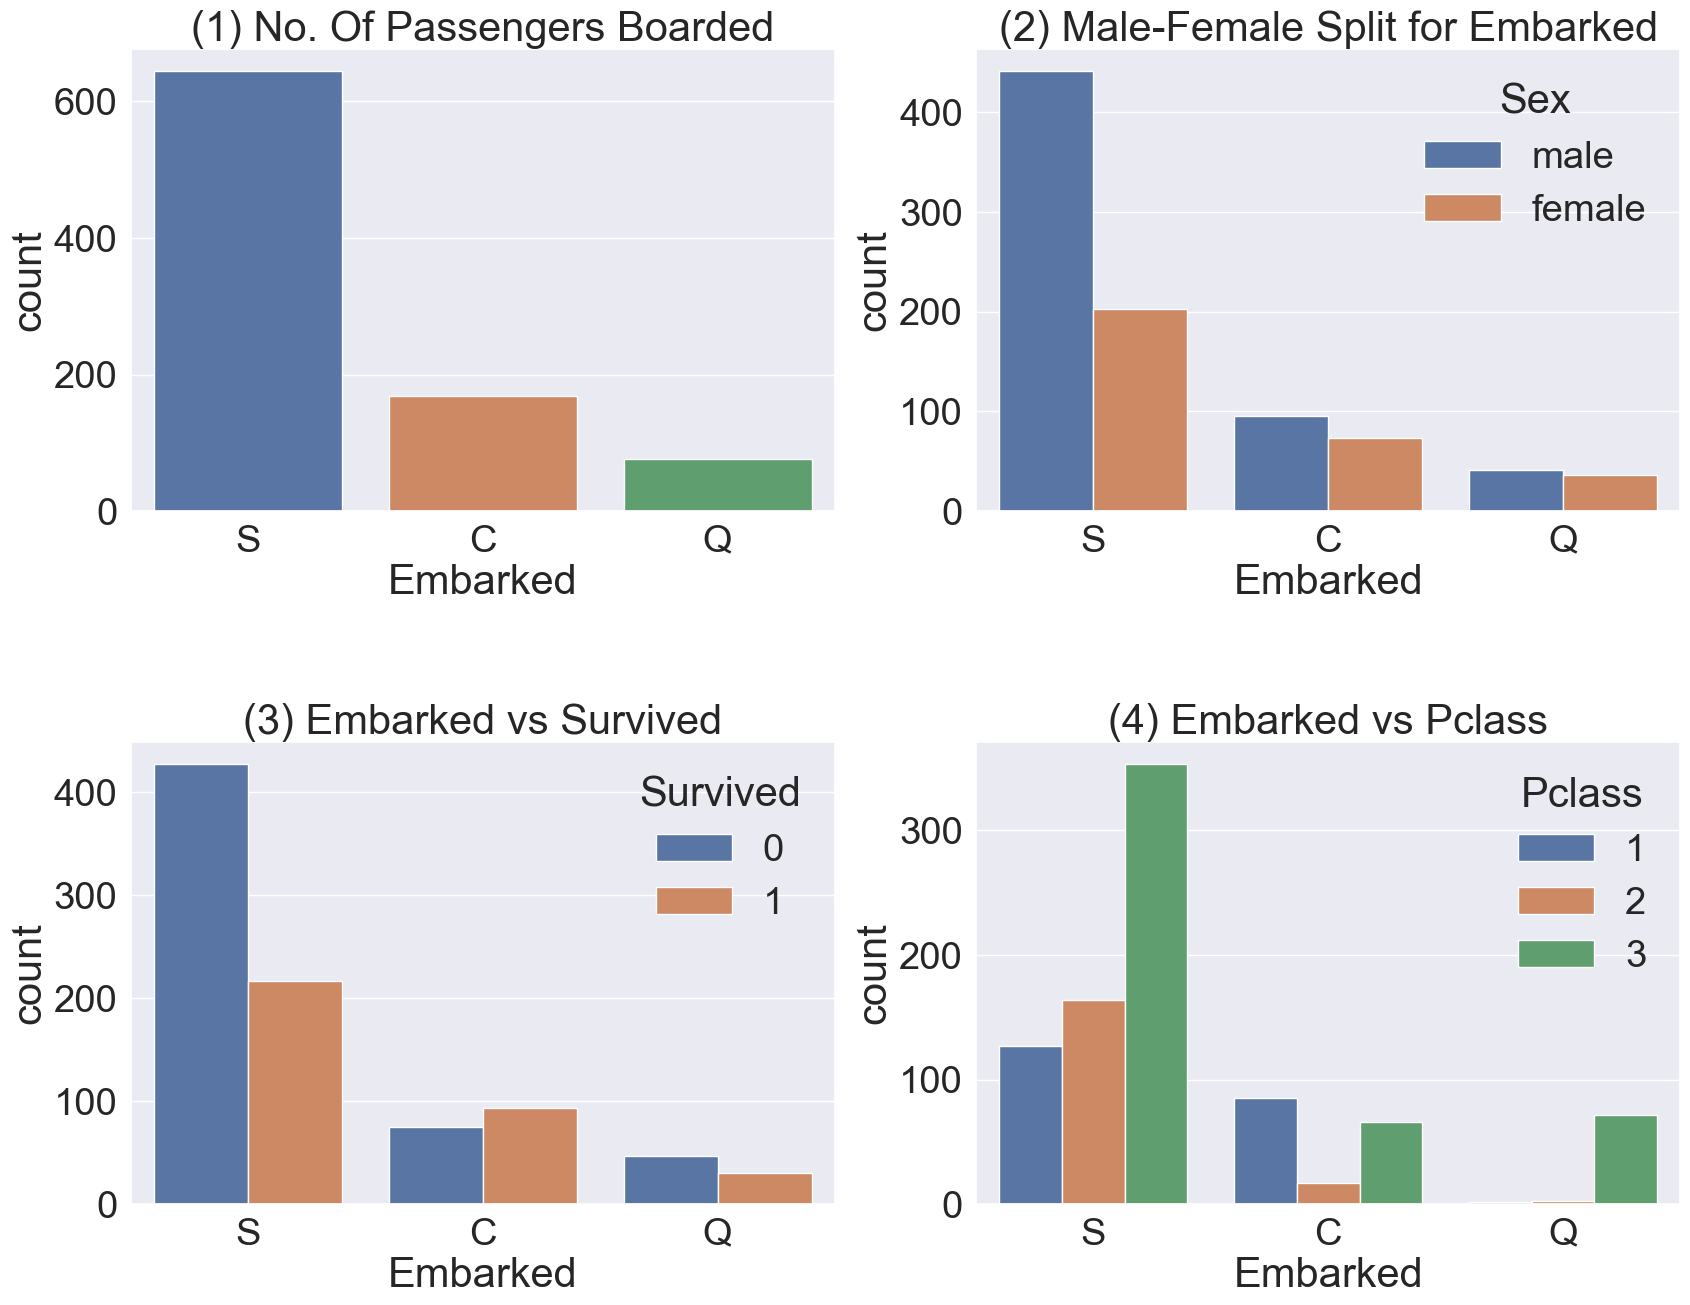

In [34]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(x='Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Family =  sibsp + parch

In [35]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
# 가족의 수, 형제 수 + 부모자녀 수 + 본인

In [36]:
print('Max Family Size: ', df_train['FamilySize'].max())
print('Min Family Size: ', df_train['FamilySize'].min())

Max Family Size:  11
Min Family Size:  1


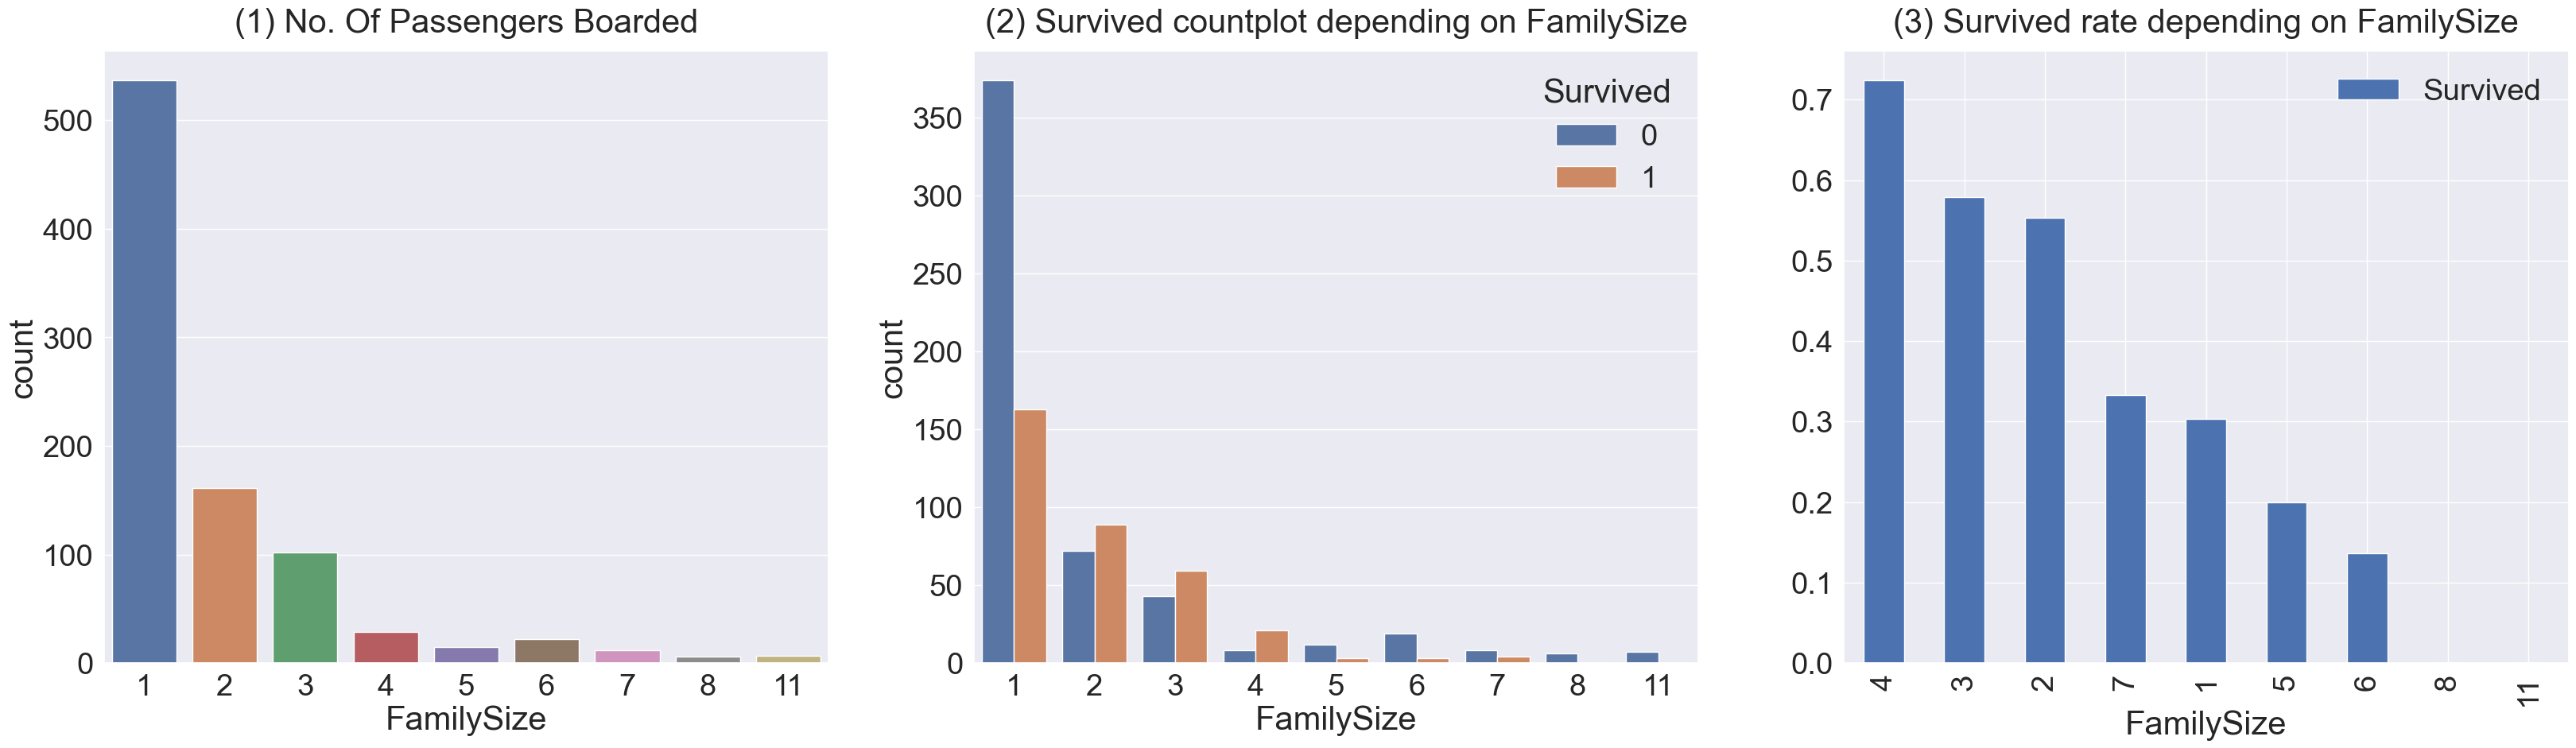

In [37]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby('FamilySize', as_index=True).mean().sort_values(by='Survived',
                                                                                             ascending=False).plot.bar(
    ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Fare Cabin Ticket

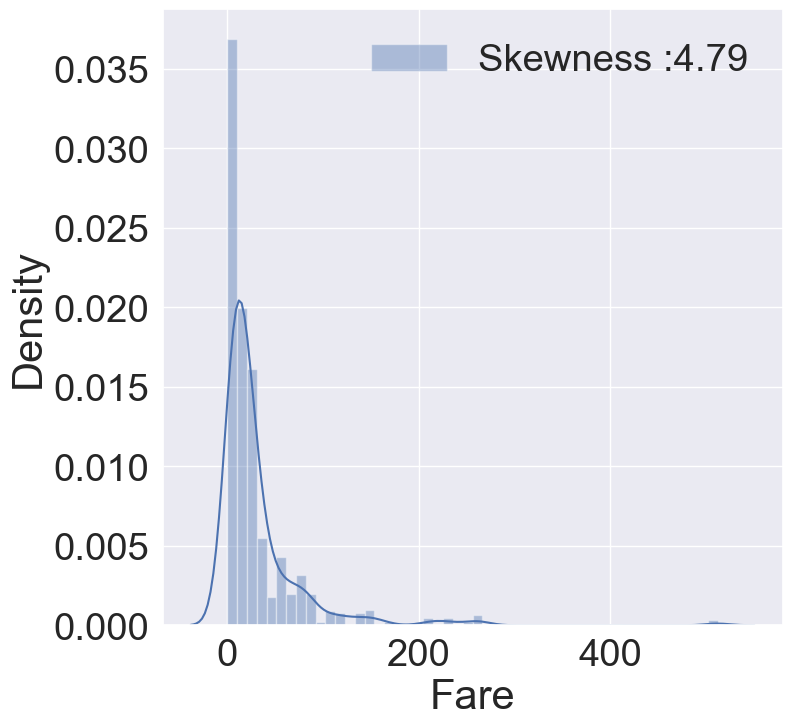

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

g = sns.distplot(df_train['Fare'], color='b', label='Skewness :{:.2f}'.format(df_train['Fare'].skew()), ax=ax)
# displot : 히스토그램 + KDE 그래프 결합
# skew() 왜도를 의미함 왜도 : 정보의 비대칭을 의미 
# 왜도 = 0  완전한 대칭 , 왜도 >0 왼쪽에 치우쳐있다. 꼬리가 오른쪽 더 길다, 왜도<0는 반대

g = g.legend(loc='best')  # 데이터를 가리지 않는 최적의 위치로 이동

이상치의 영향을 줄이기 위해서, Fare 컬럼에 log를 취한다.
log 변환을 하는 이유
1. 데이터의 대칭화
2. 분산의 안정화
3. 비선형 관계의 선형화

In [39]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
# testset 에 있는 nan value 를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
# 0보다 크하면 log를 취해주고 0보다 작거나 같으면 9으로 변환

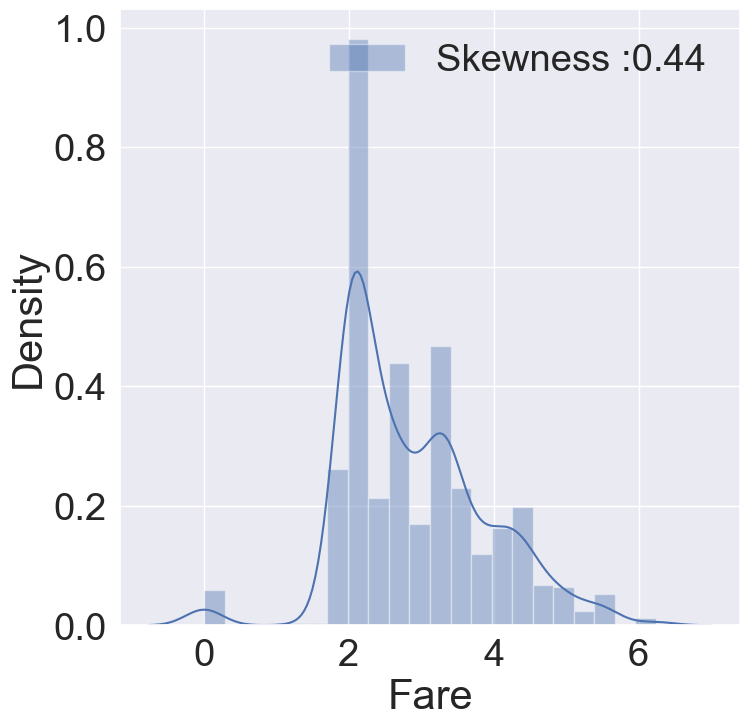

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness :{:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')


In [41]:
# cabin => null이 거의 대부분임 생략

In [42]:
# ticket 
df_train['Ticket'].value_counts()
# 다양한 종류가 있어서 특징을 뽑아내서, 모델 성능을 올릴 수 있지만 여기선 생략

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

# Feature Engineering
## Age null 채우기
=> null 값 많은건 cabin 과 age인데 cabin이 생략하므로 age의 null 을 처리
feature engineering 은 실제 모델 학습에 쓰려하므로, train 뿐 아니라 test 에도 적용시켜야함

In [43]:
df_train['Age'].isnull().sum()

177

In [44]:
# 가장 쉬운 방법 평균값 채우기
df_train['Age'].mean()

# but 5살인 사람에게 30살이라고 할 수 있음

29.69911764705882

In [45]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [46]:
df_train['Name'].str.extract('([A-Za-z]+)\.')
# pandas의 str.extract 메소드를 이용해 name 컬럼에 특정 패턴에 맞는 문자열 추출
# '([A-Za-z]+)\.' 의미
# [A-Za-z] : 모든 알파벳을 의미 /  + : 앞의 문자가 하나 이상 반복됨을 의미
# \. 정규표현식에서 .은 어떤 문자 하나를 의미, 실제 .을 찾으려고 이스케이프 문자를 찾음
# () 정규표현식에서 하나의 그룹을 만들어주는 역할


,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [47]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')

In [48]:
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [49]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T
# 여기서 T는 전치 역할

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [50]:
df_train['Initial'].replace(
    ['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
    ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)

df_test['Initial'].replace(
    ['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
    ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)

<Axes: xlabel='Initial'>

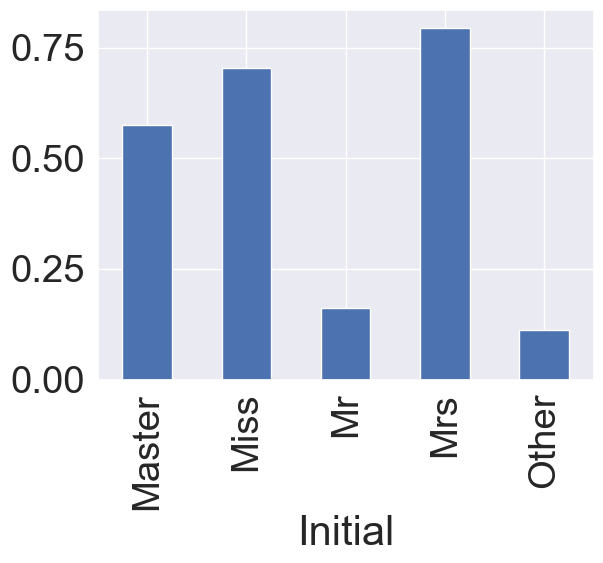

In [51]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [52]:
# train 에서 얻은 데이토로 test에도 채워줘야함 => test는 원래 볼 수 없는 것이므로 
df_train.loc[df_train['Age'].isnull(), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.135148,NaN,Q,1,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,2.564949,NaN,S,1,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,1.977547,NaN,C,1,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,1.977547,NaN,C,1,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,2.064226,NaN,Q,1,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,1.978128,NaN,C,1,Mr
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,4.242046,NaN,S,11,Miss
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,2.251292,NaN,S,1,Mr
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,2.066331,NaN,S,1,Mr


In [53]:
df_train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [54]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = 33
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Master'), 'Age'] = 5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Other'), 'Age'] = 46

In [55]:
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mr'), 'Age'] = 33
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mrs'), 'Age'] = 36
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Master'), 'Age'] = 5
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Miss'), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Other'), 'Age'] = 46

## null in embarked and categorize age


In [56]:
df_train['Embarked'].isnull().sum()

2

In [57]:
df_train['Embarked'].fillna('S', inplace=True)  # 몇개 안되니까 가장 많은걸로 채우기
df_train['Embarked'].isnull().sum()

0

In [58]:
# 나이 : 연속적인 데이터를 카테고리화 =>  정보 손실 가능
df_train['Age_cat'] = 0
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [59]:
# 하드코딩으로 하는법
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(df_train['Age'] >= 10) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(df_train['Age'] >= 20) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(df_train['Age'] >= 30) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(df_train['Age'] >= 40) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(df_train['Age'] >= 50) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(df_train['Age'] >= 60) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[df_train['Age'] >= 70, 'Age_cat'] = 7


In [60]:
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(df_test['Age'] >= 10) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(df_test['Age'] >= 20) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(df_test['Age'] >= 30) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(df_test['Age'] >= 40) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(df_test['Age'] >= 50) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(df_test['Age'] >= 60) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[df_test['Age'] >= 70, 'Age_cat'] = 7


In [61]:
def categorize_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [62]:
df_train['Age_cat2'] = df_train['Age'].apply(categorize_age)

In [63]:
(df_train['Age_cat'] == df_train['Age_cat2']).all()
# 그냥 == 을 하면 시리즈로 불린값이 나오고, all하면 모두 true 일때 true 반환
# any를 하면 하나라도 true 가 있으면 true 를 반환함

True

In [64]:
# 필요없는 age와 age_cat2 날리기
df_train.drop(['Age_cat2', 'Age'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [65]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,S,1,Mr,3


## 문자열을 범주형 피어슨 계수로 변경
문자열은 컴퓨터가 이해를 못하므로 변환하는 것

In [66]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [67]:
df_train.loc[df_train['Initial'] == 'Master', 'Initial']

7      Master
16     Master
50     Master
59     Master
63     Master
65     Master
78     Master
125    Master
159    Master
164    Master
165    Master
171    Master
176    Master
182    Master
183    Master
193    Master
261    Master
278    Master
305    Master
340    Master
348    Master
386    Master
407    Master
445    Master
480    Master
489    Master
549    Master
709    Master
751    Master
755    Master
787    Master
788    Master
802    Master
803    Master
819    Master
824    Master
827    Master
831    Master
850    Master
869    Master
Name: Initial, dtype: object

In [68]:
df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

0      2
1      3
2      1
3      3
4      2
      ..
886    4
887    1
888    1
889    2
890    2
Name: Initial, Length: 891, dtype: int64

In [69]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [70]:
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [71]:
# 특정 column에 어떤 값이 있는지 보는법 2가지
df_train.Embarked.unique()
# 넘파이 어레이로 줌

array(['S', 'C', 'Q'], dtype=object)

In [72]:
df_train['Embarked'].value_counts()
# 판다스 시리즈로 줌

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [73]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [74]:
df_train.Embarked.isnull().any()  # 널데이터가 있는지 확인

False

In [75]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})

In [76]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3


### feature 끼리의 상관 관계 보기

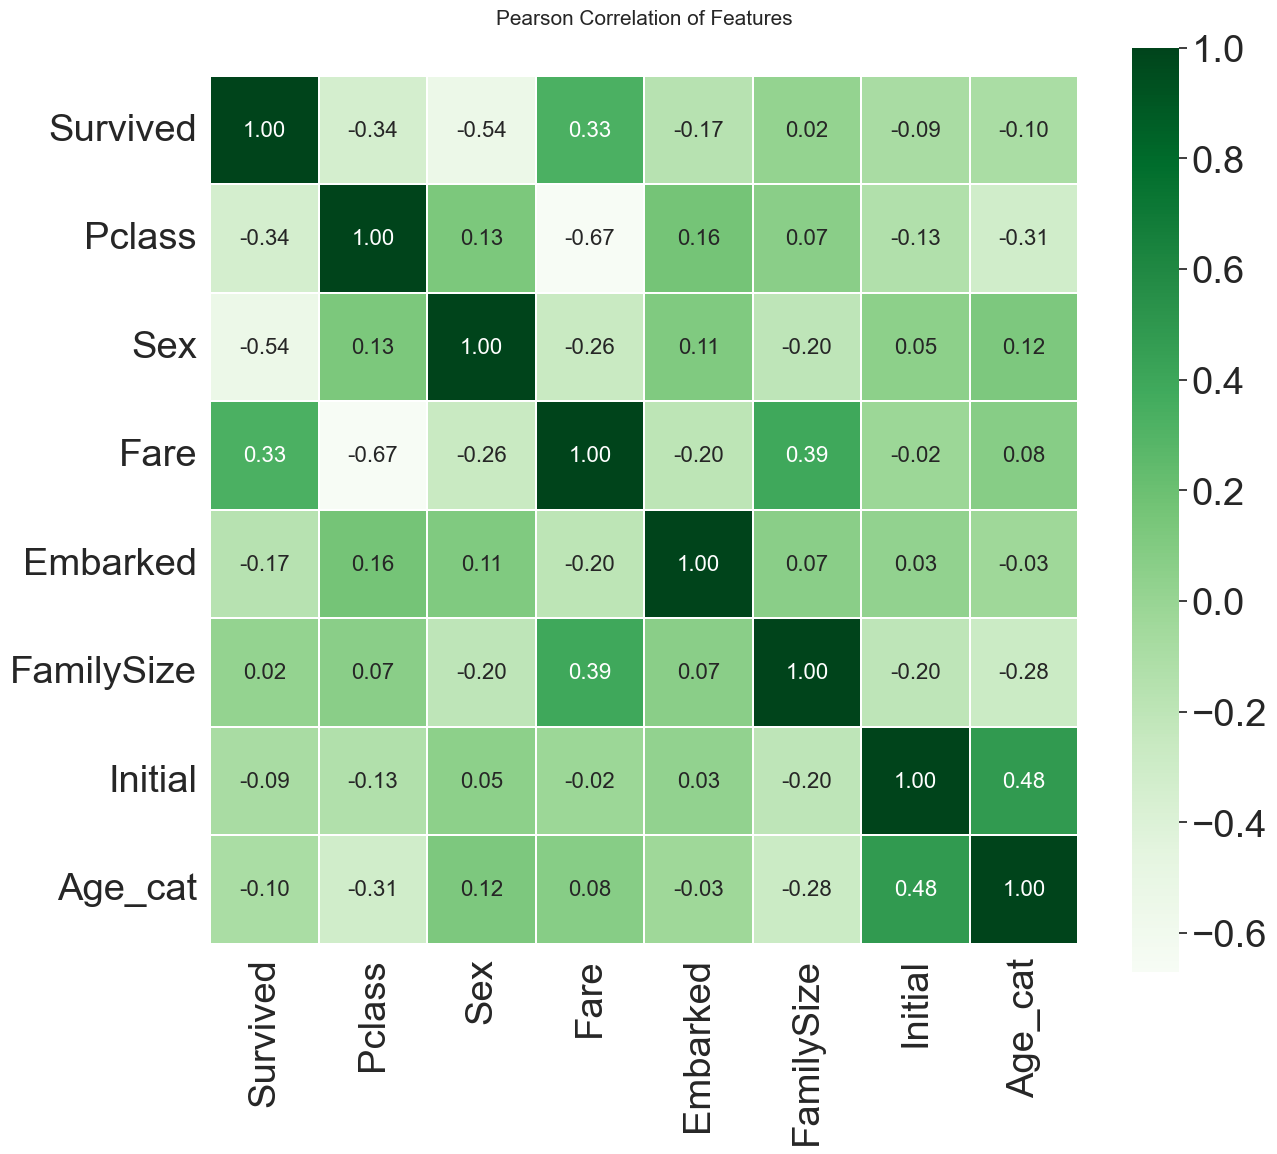

In [77]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]
# 티켓이나 이름 cabin같이 안 쓸거 빼고 가져오기

colormap = plt.cm.Greens
# 색 아무거나 고른것 Greens BuGn Blues Set1 등

plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16}, fmt = '.2f')
# heatmap_data.astype(float).corr() : 모든 데이터를 float로 바꾸고 상관 관계를 구함
# linewidths : 히트맵의 각셀간의 선 너비
# vmax : 컬러 스케일 최대값 지정 => 상관 관계 최대값 1이므로 1로 설정
# square : 각 셀을 정사각형으로 표시
# cmap : 히트맵 색상 팔레트 지정
# linecolor : 각 셀 사이의 선 색상 지정
# annot : 각 셀에 상관 계수값을 표시
# annot_kws : 상관계수 값의 크기 지정 
# fmt : .2 면 소수점 2자리에서 반올림
del heatmap_data

위 히트맵 보는 방법 => 우리가 관심 있는 survived 이 한줄을 쭉 읽으면 됨
## 원 핫 인코딩
- 모델의 성능을 높이는 방법 
- 카테고리화 되어있는 컬럼에 효율적
- 0과 1로 구성된 n차원의 벡터로 나타내는 것
- 새로운 컬럼이 n 개생김(카테고리가 n 개일때)
- 이냐 아니냐 문제가 되기 때문에, 질문이 간단하게 바뀜

In [78]:
df_train = pd.get_dummies(df_train,columns=['Initial'],prefix='Initial')
df_test = pd.get_dummies(df_test,columns=['Initial'],prefix='Initial')
# Initial 컬럼을 5개의 컬럼으로 나누어줌
# prefix : 새로 만들어지는 컬럼의 앞에 써질 단어

In [79]:
df_train = pd.get_dummies(df_train,columns=['Embarked'],prefix='Embarked')
df_test = pd.get_dummies(df_test,columns=['Embarked'],prefix='Embarked')

In [80]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,False,False,True,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,False,False,False,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,False,True,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,False,False,False,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,False,False,True,False,False,False,False,True


In [81]:
df_train = df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1)
df_test = df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1)

In [82]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,False,False,True,False,False,False,False,True
1,1,1,0,4.266662,2,3,False,False,False,True,False,True,False,False
2,1,3,0,2.070022,1,2,False,True,False,False,False,False,False,True
3,1,1,0,3.972177,2,3,False,False,False,True,False,False,False,True
4,0,3,1,2.085672,1,3,False,False,True,False,False,False,False,True


## 모델 개발

In [84]:
from sklearn.ensemble import RandomForestClassifier
# 이진 분류문제에서 classifier 알고리즘
# 랜덤 트리에서 사용
# 유명한 랜덤 classifier

from sklearn import metrics
# 모델 평가할때 사용

from sklearn.model_selection import train_test_split
# 트레이닝 셋을 쉽게 나눠주는 함수
# 트레이닝 셋 내에서 valid 셋을 만들어주는 것

In [85]:
X_train = df_train.drop(['Survived'],axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [86]:
X_tr,X_vld,y_tr,y_vld = train_test_split(X_train,target_label,test_size=0.3,random_state=2024)

In [87]:
model = RandomForestClassifier()
model.fit(X_tr,y_tr)

RandomForestClassifier()

In [88]:
prediction = model.predict(X_vld)

In [90]:
print("총 {}명 중 {: .2f}% 정확도로 생존 맞춤".format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중  81.34% 정확도로 생존 맞춤


## Feature importance
모델이 어떤  feature에  영향을 크게 받았는지를 확인

In [92]:
model.feature_importances_

array([0.08461094, 0.13251363, 0.31536988, 0.09222124, 0.12194574,
       0.01029584, 0.0481172 , 0.11494504, 0.02813914, 0.00730175,
       0.01502425, 0.0091132 , 0.02040215])

In [95]:
feature_importance = model.feature_importances_
Series_feat_imp = pd.Series(feature_importance, index=df_test.columns)

ValueError: Length of values (13) does not match length of index (12)